In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/Lenovo/Documents/ML/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check for missing values in the data

In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

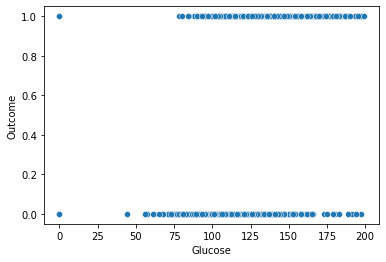

In [8]:
sns.scatterplot(x='Glucose',y='Outcome',data=data)

## Create the X and y from the dataset

In [9]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((537, 8), (231, 8))

In [15]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
165,6,104,74,18,156,29.9,0.722,41
188,8,109,76,39,114,27.9,0.640,31
334,1,95,60,18,58,23.9,0.260,22
758,1,106,76,0,0,37.5,0.197,26


### Apply logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

### Perform the predictions on X_test data and store the result in y_pred

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
lr.predict_proba(X_test)[:, -1]

array([0.9743175 , 0.16025224, 0.07678869, 0.68054499, 0.12202807,
       0.03383523, 0.80421974, 0.89679657, 0.51014323, 0.36484916,
       0.6421069 , 0.96974984, 0.31706136, 0.25439045, 0.13276918,
       0.17814531, 0.89820037, 0.02215019, 0.46767274, 0.25198114,
       0.68352329, 0.38918334, 0.2170822 , 0.0583934 , 0.05047189,
       0.3575339 , 0.0469358 , 0.94251799, 0.10887125, 0.12917358,
       0.5266059 , 0.2457053 , 0.10120476, 0.50021598, 0.08994389,
       0.67490085, 0.49705069, 0.08544325, 0.32087177, 0.73552159,
       0.28412684, 0.18463934, 0.16626438, 0.82727951, 0.76345602,
       0.01190141, 0.07938108, 0.19986779, 0.4169574 , 0.29034908,
       0.39053458, 0.17191087, 0.90113728, 0.54000752, 0.12192617,
       0.00203712, 0.06022612, 0.46440929, 0.26636825, 0.07664257,
       0.74972329, 0.46650895, 0.09067121, 0.69943862, 0.67215604,
       0.93638633, 0.72132629, 0.13263704, 0.33713364, 0.1086859 ,
       0.0968619 , 0.35015593, 0.08554545, 0.96748239, 0.82968

In [18]:
y_test = pd.DataFrame(y_test)
y_test

,Outcome
661,1
122,0
113,0
14,1
529,0
...,...
165,1
188,1
334,0
758,0


## Confusion matrix and classification report

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7792207792207793

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       176
           1       0.53      0.71      0.60        55

    accuracy                           0.78       231
   macro avg       0.71      0.76      0.73       231
weighted avg       0.81      0.78      0.79       231

